<a href="https://colab.research.google.com/github/dsgustavomoreira/Previsao_Doencas_Renais/blob/main/Previs%C3%A3o_de_Doen%C3%A7as_Renais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1º - Problema de Negócio**

O objetivo deste caso é desenvolver um **Sistema de Previsão de Doenças Renais** a fim de auxiliar os médicos na identificação das doenças crônicas dos rins. Para tanto, será utilizada a base "riscokidney_data.csv", extraída do repositório UCI, no link: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

**O dataset é composto pelas seguintes variáveis:**

*   age - age
*   bp - blood pressure
*   sg - specific gravity
*   al - albumin
*   su- sugar
*   rbc - red blood cells
*   pc - pus cell
*   pcc - pus cell clumps
*   ba - bacteria
*   bgr - blood glucose random
*   bu - blood urea
*   sc - serum creatinine
*   sod - sodium
*   pot - potassium
*   hemo - hemoglobin
*   pcv - packed cell volume
*   wc - white blood cell count
*   rc - red blood cell count
*   htn - hypertension
*   dm - diabetes mellitus
*   cad - coronary artery disease
*   appet - appetite
*   pe - pedal edema
*   ane - anemia
*   classification - class

# **2º - Análise Exploratória dos Dados:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DS Gustavo Moreira/Aula 24/Kidney_data.csv')

In [ ]:
# Importação adicional para validação dos valores nulos das variáveis numéricas. Entre outros fins. Executar quando necessário
# dataseta = pd.read_csv('/content/drive/MyDrive/DS Gustavo Moreira/Aula 24/Kidney_data.csv')

In [ ]:
dataset.shape

(400, 26)

In [ ]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
dataset.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
dataset.isnull().sum().sum()

1009

In [ ]:
# Exibe o percentual de valores faltantes em cada coluna do dataframe
dataset.isnull().mean()

id                0.0000
age               0.0225
bp                0.0300
sg                0.1175
al                0.1150
su                0.1225
rbc               0.3800
pc                0.1625
pcc               0.0100
ba                0.0100
bgr               0.1100
bu                0.0475
sc                0.0425
sod               0.2175
pot               0.2200
hemo              0.1300
pcv               0.1750
wc                0.2625
rc                0.3250
htn               0.0050
dm                0.0050
cad               0.0050
appet             0.0025
pe                0.0025
ane               0.0025
classification    0.0000
dtype: float64

In [ ]:
# Exibe quais colunas possuem/não possuem valores faltantes
dataset.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [ ]:
# Identificando o id da variável 'cad' que possue valores faltantes. Variável selecionada aleatoriamente para fins didáticos.
cad_null = dataset.index[dataset['cad'].isnull()]
print(cad_null)

Int64Index([288, 297], dtype='int64')


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
dataset.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
valoresckdt = dataset[dataset['classification']=='ckd\t']
print(valoresckdt)

# valoresckdt = dataset[dataset['classification'].str.contains('ckd\t')]
# print(valoresckdt)


      id   age    bp    sg   al   su     rbc        pc         pcc  \
37    37  72.0  80.0   NaN  NaN  NaN     NaN       NaN  notpresent   
230  230  65.0  60.0  1.01  2.0  0.0  normal  abnormal     present   

             ba  ...  pcv    wc   rc  htn   dm  cad appet  pe  ane  \
37   notpresent  ...   28  6900  2.5  yes  yes   no  poor  no  yes   
230  notpresent  ...  NaN  9500  NaN  yes  yes   no  poor  no   no   

    classification  
37           ckd\t  
230          ckd\t  

[2 rows x 26 columns]


<Axes: xlabel='classification', ylabel='count'>

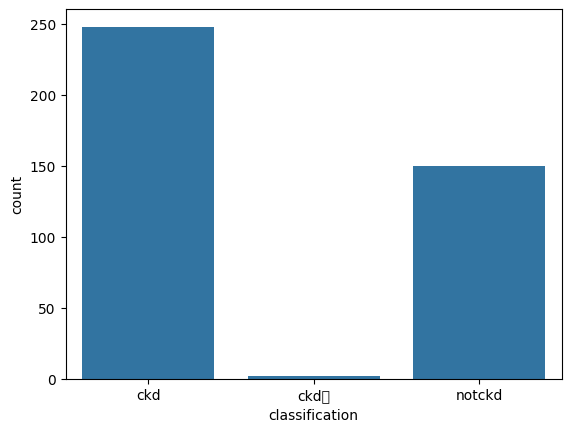

In [ ]:
sns.countplot(data=dataset, x='classification')

In [ ]:
# Frequência da variável 'rbc'. Variável selecionada aleatoriamente para fins didáticos.
# dataset['rbc'].value_counts()
dataset.rbc.value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

<Axes: xlabel='rbc', ylabel='count'>

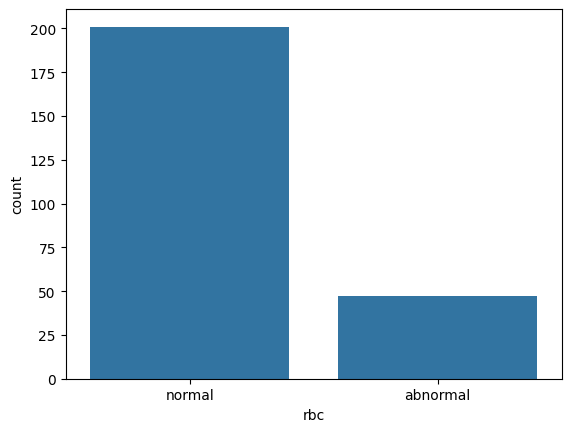

In [ ]:
sns.countplot(data=dataset, x='rbc')

<Axes: xlabel='dm', ylabel='count'>

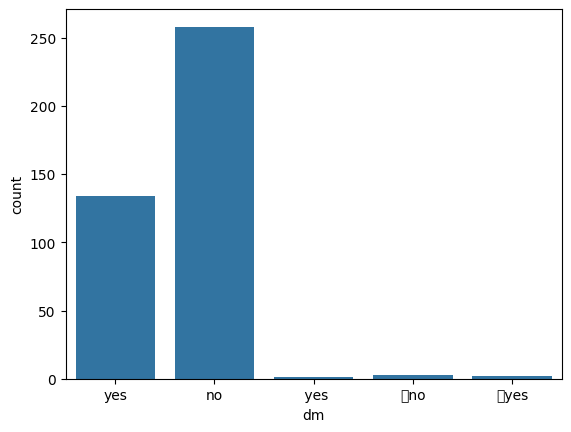

In [ ]:
# Gráfico de Barras/contagem da variável 'dm'. Variável selecionada aleatoriamente para fins didáticos.
# sns.countplot(data=dataset, x='dm')
sns.countplot(x=dataset['dm'])

In [ ]:
dataset['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [ ]:
# Identificando os registros que possuem valores incorretos na variável 'dm'

dmvalues_tno = dataset.index[dataset['dm']=='\tno']
print('Os registros que possuem "\tno" são: ',dmvalues_tno)

dmvalues_yes = dataset.index[dataset['dm']=='\tyes']
print('Os registros que possuem "\yes" são: ',dmvalues_yes)

dmvalues__yes = dataset.index[dataset['dm']==' yes']
print('Os registros que possuem " yes" são: ',dmvalues__yes)


Os registros que possuem "	no" são:  Int64Index([65, 138, 188], dtype='int64')
Os registros que possuem "\yes" são:  Int64Index([88, 194], dtype='int64')
Os registros que possuem " yes" são:  Int64Index([30], dtype='int64')


In [ ]:
# Mesma maneira de realizar a codificação acima utilizando 'isin'
dmvalues = dataset.index[dataset['dm'].isin (['\tno', '\tyes', ' yes'])]
print(dmvalues)

Int64Index([30, 65, 88, 138, 188, 194], dtype='int64')


In [ ]:
# Frequência da variável 'pc'. Variável selecionada aleatoriamente para fins didáticos.
dataset['pc'].value_counts()
# dataset.pc.value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

<Axes: xlabel='pc', ylabel='count'>

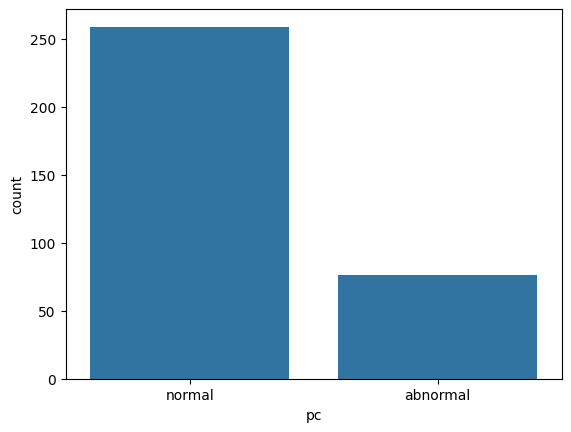

In [ ]:
# Gráfico de Barras/contagem da variável 'pc'. Variável selecionada aleatoriamente para fins didáticos.
sns.countplot(data=dataset, x='pc')
# sns.countplot(x=dataset['pc'])

<Axes: xlabel='age', ylabel='Count'>

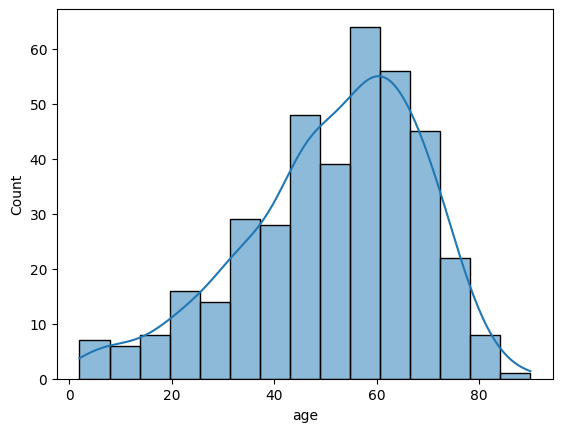

In [ ]:
sns.histplot(data=dataset, x='age', bins=15, kde=True)

# **3º - Pré-Processamento e Limpeza dos Dados:**

In [ ]:
dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
dataset = dataset.drop('id', axis=1)

In [ ]:
# Código para verificar os valores nulos das variáveis numéricas. Ver importação do dataframe nas linhas iniciais do código

#dataseta['age'].isnull().sum()
#dataseta['bp'].isnull().sum()
#dataseta['sg'].isnull().sum()
#dataseta['al'].isnull().sum()
#dataseta['su'].isnull().sum()
#dataseta['bgr'].isnull().sum()
#dataseta['bu'].isnull().sum()
#dataseta['sc'].isnull().sum()
#dataseta['sod'].isnull().sum()
#dataseta['pot'].isnull().sum()
#dataseta['hemo'].isnull().sum()

In [ ]:
dataset['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

Substituindo os valores das variáveis categóricas por numéricos através de códigos. Variáveis: rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane

In [ ]:
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

In [ ]:
dataset['rbc'].value_counts()

0.0    201
1.0     47
Name: rbc, dtype: int64

In [ ]:
dataset['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [ ]:
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

In [ ]:
dataset['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [ ]:
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent' : 0, 'present' : 1})

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    float64
 6   pc              335 non-null    float64
 7   pcc             396 non-null    float64
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
dataset['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [ ]:
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent' : 0, 'present' : 1})

In [ ]:
dataset['ba'].value_counts()

0.0    374
1.0     22
Name: ba, dtype: int64

In [ ]:
dataset['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [ ]:
dataset['htn'] = dataset['htn'].replace(to_replace = {'no' : 0, 'yes' : 1})

In [ ]:
dataset['htn'].value_counts()

0.0    251
1.0    147
Name: htn, dtype: int64

In [ ]:
dataset['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [ ]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'no' : 0, 'yes' : 1})

In [ ]:
dataset['dm'].value_counts()

0        258
1        134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [ ]:
# Identificando os registros que possuem valores incorretos na variável 'dm'

dmvalues_tno = dataset.index[dataset['dm']=='\tno']
print('Os registros que possuem "tno" são: ',dmvalues_tno)

dmvalues_yes = dataset.index[dataset['dm']=='\tyes']
print('Os registros que possuem "\yes" são: ',dmvalues_yes)

dmvalues__yes = dataset.index[dataset['dm']==' yes']
print('Os registros que possuem " yes" são: ',dmvalues__yes)

Os registros que possuem "tno" são:  Int64Index([65, 138, 188], dtype='int64')
Os registros que possuem "\yes" são:  Int64Index([88, 194], dtype='int64')
Os registros que possuem " yes" são:  Int64Index([30], dtype='int64')


In [ ]:
# Mesma maneira de realizar a codificação acima utilizando 'isin'
dmvalues = dataset.index[dataset['dm'].isin (['\tno', '\tyes', ' yes'])]
print(dmvalues)

Int64Index([30, 65, 88, 138, 188, 194], dtype='int64')


In [ ]:
# Remover os registros pelos índices específicos
# dataset.drop(30, 65, 88, 138, 188, 194, inplace=True)
dataset.drop(dmvalues, inplace=True)

In [ ]:
# Mesma maneira de realizar a codificação acima utilizando 'isin'
dmvalues = dataset.index[dataset['dm'].isin (['\tno', '\tyes', ' yes'])]
print(dmvalues)

Int64Index([], dtype='int64')


In [ ]:
dataset['dm'].value_counts()

0    258
1    134
Name: dm, dtype: int64

In [ ]:
dataset['cad'].value_counts()

no      356
yes      34
\tno      2
Name: cad, dtype: int64

In [ ]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'no': 0, 'yes': 1})

In [ ]:
# Identificando os índices dos registros que possuem o valor '\tno'

cadvalues = dataset.index[dataset['cad'].isin (['\tno'])]
print(cadvalues)

Int64Index([40, 64], dtype='int64')


In [ ]:
dataset.drop(cadvalues, inplace=True)

In [ ]:
dataset['cad'].value_counts()

0    356
1     34
Name: cad, dtype: int64

In [ ]:
dataset['appet'].value_counts()

good    309
poor     82
Name: appet, dtype: int64

In [ ]:
dataset['appet'] = dataset['appet'].replace(to_replace = {'good' : 0, 'poor': 1})

In [ ]:
dataset['appet'].value_counts()

0.0    309
1.0     82
Name: appet, dtype: int64

In [ ]:
dataset['pe'].value_counts()

no     315
yes     76
Name: pe, dtype: int64

In [ ]:
dataset['pe'] = dataset['pe'].replace(to_replace = {'no': 0, 'yes': 1})

In [ ]:
dataset['pe'].value_counts()

0.0    315
1.0     76
Name: pe, dtype: int64

In [ ]:
dataset['ane'].value_counts()

no     331
yes     60
Name: ane, dtype: int64

In [ ]:
dataset['ane'] = dataset['ane'].replace(to_replace = {'no': 0, 'yes': 1})

In [ ]:
dataset['ane'].value_counts()

0.0    331
1.0     60
Name: ane, dtype: int64

In [ ]:
dataset['classification'].value_counts()

ckd       240
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
dataset['classification'] = dataset['classification'].replace(to_replace = {'ckd': 0, 'notckd': 1})

In [ ]:
# Identificando os índices dos registros que possuem o valor 'ckd\t'
clavalues = dataset.index[dataset['classification'].isin (['ckd\t'])]
print(clavalues)

Int64Index([37, 230], dtype='int64')


In [ ]:
dataset.drop(clavalues, inplace=True)

In [ ]:
dataset['classification'].value_counts()

0    240
1    150
Name: classification, dtype: int64

In [ ]:
dataset['classification'] = dataset['classification'].astype(int)

In [ ]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1,0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0,0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1,0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0,0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0,0,0.0,0.0,0.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             382 non-null    float64
 1   bp              380 non-null    float64
 2   sg              346 non-null    float64
 3   al              347 non-null    float64
 4   su              345 non-null    float64
 5   rbc             246 non-null    float64
 6   pc              329 non-null    float64
 7   pcc             386 non-null    float64
 8   ba              386 non-null    float64
 9   bgr             348 non-null    float64
 10  bu              372 non-null    float64
 11  sc              374 non-null    float64
 12  sod             308 non-null    float64
 13  pot             307 non-null    float64
 14  hemo            343 non-null    float64
 15  pcv             326 non-null    object 
 16  wc              291 non-null    object 
 17  rc              267 non-null    obj

In [ ]:
# Tendo em vista a grande quantidade de registros com valores ausentes, optou-se pela imputação pela mediana,
# com exceção das variáveis pcv, wc e rc, que ainda não foram convertidas de object para float64 pois possuem valores "string", o que
# ocasionava erros na conversão. Para tanto optou-se por identificar as strings e deletar os registros como será visto abaixo no decorrer do código.
# Vale ressaltar que entre as três variáveis, somente a 'rc' possuia strings, ou seja, as demais, 'pcv' e 'wc' poderiam ter tido valores da mediana imputados.

In [ ]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
            'sc', 'sod', 'pot', 'hemo', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [ ]:
datasetcopia = dataset

In [ ]:
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [ ]:
dataset.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                64
wc                 99
rc                123
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [ ]:
## dataset['rc'].isnull().sum()

In [ ]:
# Tendo em vista o elevado número de valores nulos das colunas pcv, wc e rc, optou-se por:
# 1. Excluir os registros que possuem as três variáveis com valores nulos
# 2. Transformar os registros restantes de object para float64. No entanto para isso foi necessário identificar a variável que possue valores de
# string nos campos
# 3. Utilizar a mediana para os valores nulos conforme cada variável

In [ ]:
quantidade_registros_nulos = dataset[['pcv', 'wc', 'rc']].isnull().all(axis=1).sum()
print(quantidade_registros_nulos)

58


In [ ]:
# Identificar os índices dos registros com valores nulos em todas as colunas
indices_registros_nulos = dataset[dataset[['pcv', 'wc', 'rc']].isnull().all(axis=1)].index.tolist()

# Imprimir os índices dos registros com valores nulos em todas as colunas
print("Índices dos registros com valores nulos em todas as colunas: ", indices_registros_nulos)
print('A quantidade de registro que possuem valores nulos em comun nas colunas "pcv", "wc", "rc" é: ', len(indices_registros_nulos))

#############  ATENÇÃO: a quantidade foi 62 quando não excluiu dos demais campos / \\ t ? mas quando executo TUDO o total é 58

Índices dos registros com valores nulos em todas as colunas:  [13, 16, 17, 23, 28, 34, 38, 41, 45, 57, 59, 60, 61, 67, 72, 75, 82, 83, 85, 86, 89, 95, 100, 104, 109, 116, 118, 119, 120, 122, 125, 129, 136, 140, 142, 143, 146, 148, 156, 165, 166, 183, 186, 192, 195, 203, 211, 215, 221, 222, 224, 228, 232, 233, 247, 273, 319, 324]
A quantidade de registro que possuem valores nulos em comun nas colunas "pcv", "wc", "rc" é:  58


In [ ]:
datasetcopia=dataset

In [ ]:
dataset.shape

(390, 25)

In [ ]:
dataset.drop(indices_registros_nulos, inplace=True)

In [ ]:
dataset.shape

(332, 25)

In [ ]:
## dataset['rc'].isnull().sum()

In [ ]:
# Verificou-se que ainda que as colunas pcv, wc e rc possuiam valores nulos, de forma individual.
dataset.isnull().sum()

age                0
bp                 0
sg                 0
al                 0
su                 0
rbc                0
pc                 0
pcc                0
ba                 0
bgr                0
bu                 0
sc                 0
sod                0
pot                0
hemo               0
pcv                6
wc                41
rc                65
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [ ]:
# Código para identificar os valores nulos em cada coluna de forma individual
print(dataset['pcv'].isnull().sum())
nulospcv = dataset.index[dataset['pcv'].isnull()]
print(nulospcv)

6
Int64Index([113, 114, 175, 197, 209, 365], dtype='int64')


In [ ]:
# Código para deletar os valores nulos em cada coluna de forma individual
dataset.drop(nulospcv, inplace=True)
dataset['pcv'].isnull().sum()

0

In [ ]:
# Código para identificar os valores nulos em cada coluna de forma individual
print(dataset['wc'].isnull().sum())
nuloswc = dataset.index[dataset['wc'].isnull()]
print(nuloswc)

41
Int64Index([  6,  10,  29,  33,  36,  44,  51,  55,  63,  66,  68,  78,  96,
            112, 121, 135, 139, 149, 151, 152, 154, 158, 169, 177, 179, 180,
            182, 201, 202, 204, 205, 206, 216, 231, 236, 238, 239, 274, 287,
            302, 330],
           dtype='int64')


In [ ]:
# Código para deletar os valores nulos em cada coluna de forma individual
dataset.drop(nuloswc, inplace=True)
dataset['wc'].isnull().sum()

0

In [ ]:
# Código para identificar os valores nulos em cada coluna de forma individual
print(dataset['rc'].isnull().sum())
nulosrc = dataset.index[dataset['rc'].isnull()]
print(nulosrc)

22
Int64Index([  1,   2,  47,  73, 102, 106, 123, 131, 137, 141, 150, 155, 167,
            168, 173, 178, 185, 187, 218, 220, 235, 237],
           dtype='int64')


In [ ]:
# Código para deletar os valores nulos em cada coluna de forma individual
dataset.drop(nulosrc, inplace=True)
dataset['rc'].isnull().sum()

0

In [ ]:
datasetcopia = dataset

In [ ]:
# Optou-se agora por transformar as variáveis pcv, wc, e rc de object para float64
# No entanto verificou-se que a variável 'rc' valores das features possuiam valores que não poderiam ser convertidos

dataset['pcv'] = dataset['pcv'].astype(float)
dataset['wc'] = dataset['wc'].astype(float)
# dataset['rc'] = dataset['rc'].astype(float)

In [ ]:
dataset['pcv'] = dataset['pcv'].astype(float)
dataset['wc'] = dataset['wc'].astype(float)

In [ ]:
# Identificação dos registros com strings '\t' na variável rc
rc = dataset['rc'].unique()

# Imprimir as informações
print("Descrição da coluna 'rc':")
print(rc)

Descrição da coluna 'rc':
['5.2' '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0' '5.0'
 '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '2.4' '4.8' '\t?' '5.4'
 '6.1' '2.5' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9' '6.5']


In [ ]:
dataset['rc'].isnull().sum()

0

In [ ]:
# Identificando o índice do registro com '\t' na feature rc
# necessário utilizar A letra 'r' (raw) antes do valor em uma expressão regular em Python indica uma "string bruta".
# Uma string bruta trata os caracteres de escape, como barras invertidas (\), de forma literal, sem interpretá-los como caracteres especiais.
letra = r'\t\?'

In [ ]:
indice = dataset[dataset['rc'].str.contains(letra, case=False, na=False)].index.tolist()
print(indice)

[162]


In [ ]:
dataset.drop([162], inplace=True)

In [ ]:
dataset.isnull().any().sum()

0

In [ ]:
dataset['rc'] = dataset['rc'].astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             262 non-null    float64
 1   bp              262 non-null    float64
 2   sg              262 non-null    float64
 3   al              262 non-null    float64
 4   su              262 non-null    float64
 5   rbc             262 non-null    float64
 6   pc              262 non-null    float64
 7   pcc             262 non-null    float64
 8   ba              262 non-null    float64
 9   bgr             262 non-null    float64
 10  bu              262 non-null    float64
 11  sc              262 non-null    float64
 12  sod             262 non-null    float64
 13  pot             262 non-null    float64
 14  hemo            262 non-null    float64
 15  pcv             262 non-null    float64
 16  wc              262 non-null    float64
 17  rc              262 non-null    flo

In [ ]:
dataset.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
dataset.shape

(262, 25)

<Axes: >

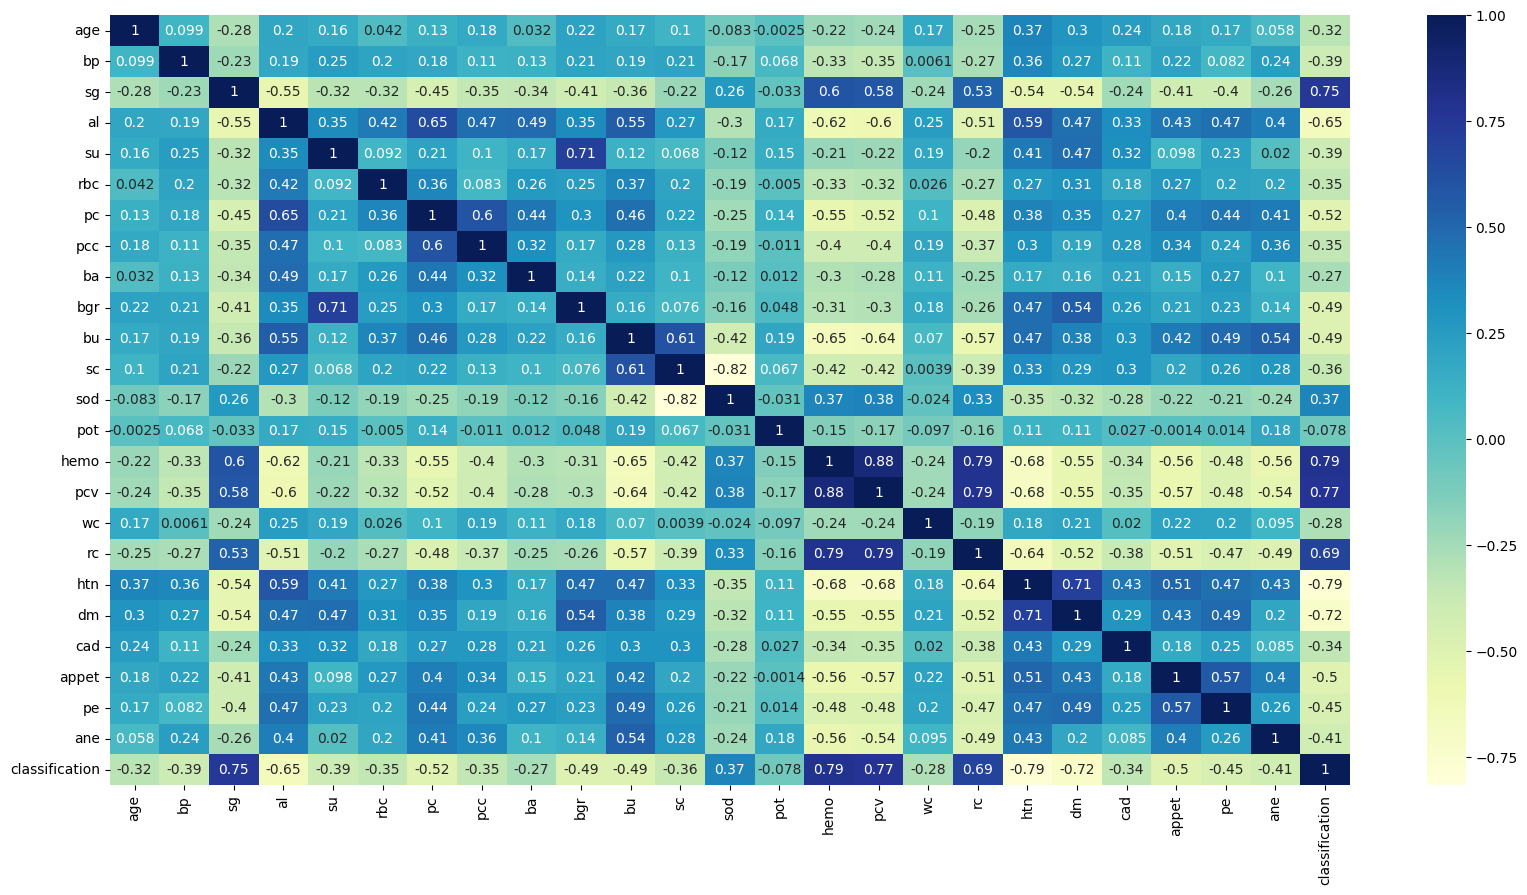

In [ ]:
# Heatmp para verificar se há correlação entre as variáveis

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')

In [ ]:
# Tendo em vista que as variáveis 'pcv' e 'hemo' possuem elevada correlação, o que poderia ocasionar multicolinearidade, optou-se por
# fazer a exclusão de uma delas, a variável 'pcv'.

dataset.drop('pcv', axis=1, inplace=True)

In [ ]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,15.4,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0
5,60.0,90.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,74.0,...,12.2,7800.0,4.4,1.0,1.0,0.0,0.0,1.0,0.0,0
7,24.0,80.0,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,...,12.4,6900.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0


<Axes: xlabel='classification', ylabel='count'>

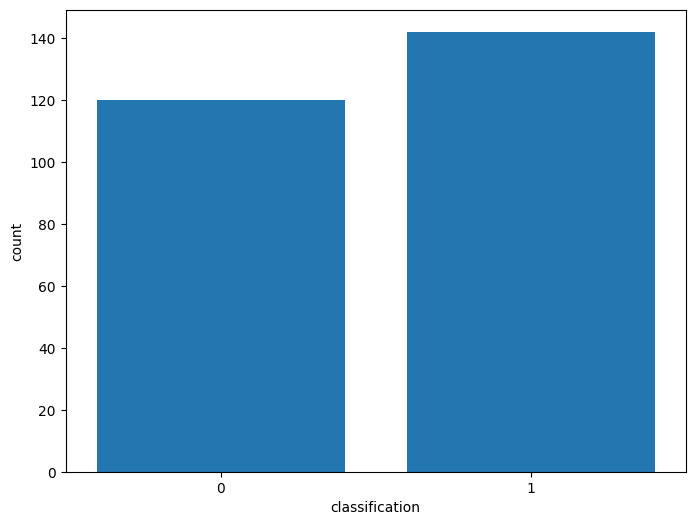

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=dataset, x='classification', saturation=0.95)

In [ ]:
X = dataset.drop('classification', axis=1)
y = dataset['classification']

# **4º - Construção e Avaliação da Máquina Preditiva**

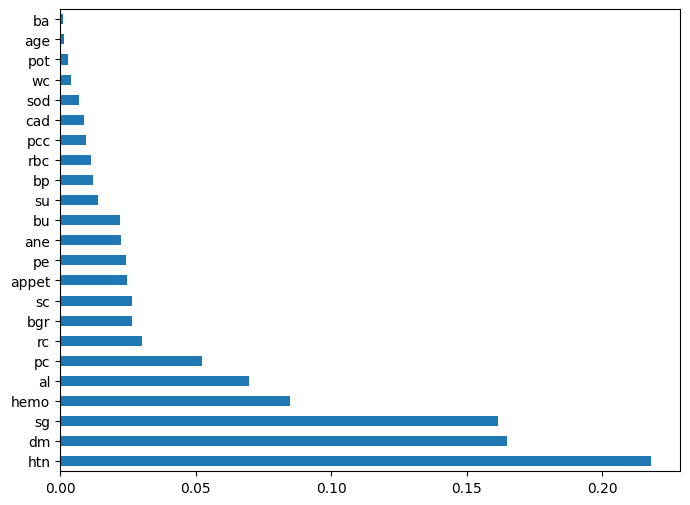

In [ ]:
# Usando o ExtraTrees para identificar as variáveis mais importantes
etc = ExtraTreesClassifier()
etc.fit(X, y)

plt.figure(figsize=(8,6))
bestfeatures = pd.Series(etc.feature_importances_, index=X.columns)
bestfeatures.nlargest(24).plot(kind='barh')
plt.show()

In [ ]:
# Função para ranquear as 8 variáveis mais importantes
bestfeatures.nlargest(8).index

Index(['htn', 'dm', 'sg', 'hemo', 'al', 'pc', 'rc', 'bgr'], dtype='object')

In [ ]:
X = dataset[['htn', 'dm', 'sg', 'hemo', 'pc', 'al', 'appet', 'rc']]
X.head()

,htn,dm,sg,hemo,pc,al,appet,rc
0,1.0,1.0,1.020,15.4,0.0,1.0,0.0,5.2
3,1.0,0.0,1.005,11.2,1.0,4.0,1.0,3.9
4,0.0,0.0,1.010,11.6,0.0,2.0,0.0,4.6
5,1.0,1.0,1.015,12.2,0.0,3.0,0.0,4.4
7,0.0,1.0,1.015,12.4,1.0,2.0,0.0,5.0


In [ ]:
y.value_counts()

1    142
0    120
Name: classification, dtype: int64

In [ ]:
# Amostragem
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

In [ ]:
print(X_train.shape)
print(x_test.shape)

(183, 8)
(79, 8)


## 4.1 - Aplicação do Algoritmo **RandomForest**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfcprev = rfc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, rfcprev)
print(cm)
cl = classification_report(y_test, rfcprev)
print(cl)
accs = accuracy_score(y_test, rfcprev)
print('Acurácia=: ', accs)

[[29  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        50

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

Acurácia=:  1.0


## 4.2 - Aplicação do Algoritmo **GradientBoostingClassifier**

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
gbcprev = gbc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, gbcprev)
print(cm)
cl = classification_report(y_test, gbcprev)
print(cl)
accs = accuracy_score(y_test, gbcprev)
print('Acurácia=: ', accs)

[[29  0]
 [ 1 49]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        50

    accuracy                           0.99        79
   macro avg       0.98      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79

Acurácia=:  0.9873417721518988


# **5º - Salvar a Máquina Preditiva - Gradient Boosting Classifier:**



In [ ]:
filename = 'Gradiente_boosting.pkl'
pickle.dump(GradientBoostingClassifier, open(filename, 'wb'))